In [102]:
import pandas as pd
import glob

In [103]:
# Tentukan path ke folder dataset
folder_path = 'Dataset/'

# Buat pola untuk mencocokkan file CSV di dalam folder
file_pattern = '*.csv'

# Gunakan modul glob untuk mendapatkan daftar file yang sesuai dengan pola
file_list = glob.glob(folder_path + file_pattern)

# Buat list kosong untuk menyimpan DataFrame dari setiap file CSV
dfs = []

# Loop melalui setiap file dan baca sebagai DataFrame, lalu tambahkan ke list
for file in file_list:
    df = pd.read_csv(file, sep=";")
    dfs.append(df)

# Gabungkan semua DataFrame menjadi satu
merged_df = pd.concat(dfs, ignore_index=True)

In [104]:
# # Mencari nilai yang mengandung kata 'mrk' dalam kolom 'full_text'
# result_df = df[df['full_text'].str.contains('mrk')]

# # Tampilkan hasilnya
# for i in result_df['full_text'].to_numpy() :
#     print(i)

In [105]:
merged_df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Oct 20 23:59:50 +0000 2023,1715518217446420971,"Buka Suara, Presiden RI Jokowi Mengecam Keras ...",0,0,0,1,in,1695702905268178944,1715518217446420971,summerrain_d,https://twitter.com/summerrain_d/status/171551...
1,Fri Oct 20 23:59:40 +0000 2023,1715518176870744332,Kini Palestina memanggil berikanlah Mereka kek...,0,0,0,1,in,779355956069085184,1715518176870744332,riatul_HN,https://twitter.com/riatul_HN/status/171551817...
2,Fri Oct 20 23:59:18 +0000 2023,1715518081408151615,kalau perang Palestina mereka manfaat cari uan...,0,0,0,0,in,1300513006455910400,1715518081408151615,Rani34079287,https://twitter.com/Rani34079287/status/171551...
3,Fri Oct 20 23:59:17 +0000 2023,1715518079885807813,@Marie18909292 @DeHoutman_id Lu samperin aj ke...,0,2,0,0,in,50633077,1715325471670653407,muthijairoi,https://twitter.com/muthijairoi/status/1715518...
4,Fri Oct 20 23:59:02 +0000 2023,1715518014467268645,@Hilmi28 Hamas tidak mewakili rakyat palestina...,0,0,0,0,in,1658871216852303876,1715365067867504759,tjahjadoel90,https://twitter.com/tjahjadoel90/status/171551...


In [106]:
# merged_df['full_text']

<h3><b>Preprocessing

In [107]:
import re
from nltk.corpus import  stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_tag(text):
    text = text.lower()
    words = text.split()
    filtered_words = [word for word in words if not word.startswith('#')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('http')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('https')]  # Menghapus kata-kata yang dimulai dengan '#'
    return ' '.join(filtered_words)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    text = text.lower()
    hasil = re.sub(r'[^\w\s]', '', text)
    return hasil

def ubah_angka(text):
    text = text.lower()
    # Menggunakan regular expression untuk mengganti karakter alay
    teks_benar = re.sub(r'3', 'e', text)
    teks_benar = re.sub(r'4', 'a', teks_benar)
    teks_benar = re.sub(r'1', 'i', teks_benar)
    teks_benar = re.sub(r'0', 'o', teks_benar)
    return teks_benar

def remove_number(text) :
    hasil = re.sub(r'\d', '', text)
    return hasil

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    text = text.lower()
    # Menggunakan ekspresi reguler untuk mencari dan menghapus tautan
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    return re.sub(r'https\S+|www\S+|https\S+', '', text)

# Fungsi untuk mengganti singkatan dengan nilai sesuai dari kamus
def ganti_singkatan(text):
    text = text.lower()
    # Baca kamus slangword dari file teks
    slangword_path = 'kbba.txt'
    with open(slangword_path, 'r') as file:
        slangword_dict = dict(line.strip().split(':') for line in file)

    words = text.split()
    for i, word in enumerate(words):
        if word in slangword_dict:
            words[i] = slangword_dict[word]
    return ' '.join(words)

# remove english stopwords function
def remove_stopwords(text):
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

def stopwords_indo(text):
    text = text.lower()
    stop_factory = StopWordRemoverFactory()
    more_stopword = ['dengan', 'ia','bahwa','oleh']
    data = stop_factory.get_stop_words()+more_stopword
    stopword = stop_factory.create_stop_word_remover()
    return stopword.remove(text)

def stemming(text):
    text = text.lower()
    Fact = StemmerFactory()
    Stemmer = Fact.create_stemmer()
    return Stemmer.stem(text)

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_single_letter_words(text):
    text = re.sub(r'\b\w\b', '', text)
    
    hapus = ['id','amp','deh','tanyakanrl','sih','na','si','rj','lc','ar','oe','al','sm','ri','en','ar','mc','vt','rob','ny','dc','az','va']
    words = text.split()

    # Memfilter kata-kata yang tidak ada dalam array yang akan dihapus
    kata_kata_tanpa_kata_yang_dihapus = [kata for kata in words if kata not in hapus]

    # Menggabungkan kata-kata yang tersisa menjadi kalimat baru
    kalimat_tanpa_kata_yang_dihapus = ' '.join(kata_kata_tanpa_kata_yang_dihapus)
    return kalimat_tanpa_kata_yang_dihapus


# Preprocessing kolom 'text'
merged_df['full_text'] = merged_df['full_text'].apply(ganti_singkatan)
merged_df['full_text'] = merged_df['full_text'].apply(remove_punctuation)
merged_df['full_text'] = merged_df['full_text'].apply(remove_tag)
merged_df['full_text'] = merged_df['full_text'].apply(ubah_angka)
merged_df['full_text'] = merged_df['full_text'].apply(remove_number)
merged_df['full_text'] = merged_df['full_text'].apply(remove_links)
merged_df['full_text'] = merged_df['full_text'].apply(remove_stopwords)
merged_df['full_text'] = merged_df['full_text'].apply(stopwords_indo)
merged_df['full_text'] = merged_df['full_text'].apply(stemming)
merged_df['full_text'] = merged_df['full_text'].apply(remove_single_letter_words)

# Menampilkan DataFrame setelah preprocessing
merged_df.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Oct 20 23:59:50 +0000 2023,1715518217446420971,buka suara presiden jokowi kecam keras tindak ...,0,0,0,1,in,1695702905268178944,1715518217446420971,summerrain_d,https://twitter.com/summerrain_d/status/171551...
1,Fri Oct 20 23:59:40 +0000 2023,1715518176870744332,palestina panggil beri kuat baik kuat baik had...,0,0,0,1,in,779355956069085184,1715518176870744332,riatul_HN,https://twitter.com/riatul_HN/status/171551817...


In [108]:
merged_df['full_text'][10]

'zidnsptra memelord mantap saudara lakilaki dukung berangkat palestina gabung hamas kurang suicide squad'

In [109]:
merged_df.shape

(4418, 12)

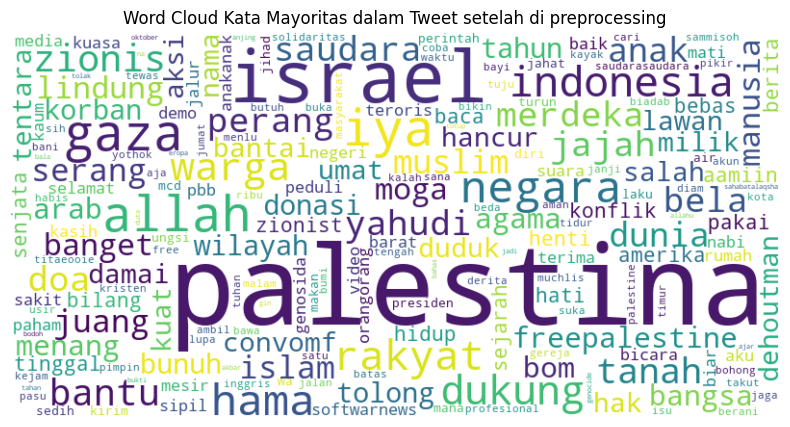

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tes = merged_df['full_text'].to_list()
# Menggabungkan semua kata dalam kolom tweet
all_words = ' '.join(tes)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Mayoritas dalam Tweet setelah di preprocessing')
plt.show()